In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import kurtosis

print('fet')

fet


In [2]:
from numpy import pi, exp
print(pi, exp(2))

3.141592653589793 7.38905609893065


In [ ]:
C_m = 9*pi
E_Na =115
E_K =-12
V_rest =10.6
G_Na =1080*pi
G_K =324*pi
G_m =2.7*pi
I=280

def a_m(V):
    return (25 - V)/(10*(exp((25-V)/10)-1))

def b_m(V):
    return 4 * exp(-V/18)

def a_n(V):
    return (10 - V)/(100*(exp((10-V)/10) - 1))
def b_n(V):
    return 0.125 * exp(-V/80)

def a_h(V):
    return 0.07 * exp(-V/20)
def b_h(V):
    return 1/(exp((30 - V)/10) + 1)



def dVdt(V,m, n, h):
    return (G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m

def dndt(V,n):
    return a_n(V)*(1-n)-b_n(V)*n

def dmdt(V,m):
    return a_m(V)*(1-m)-b_m(V)*m

def dhdt(V,h):
    return a_h(V)*(1-h)-b_h(V)*h



def rungeKutta(V_rest,t_f,h_step):
    nsteps=int(t_f/h_step)
    Vol=np.zeros(nsteps)
    time=np.zeros(nsteps)
    V=V_rest
    n=np.random.uniform()
    m=np.random.uniform()
    h=np.random.uniform()
    t=0
	for i in range(1, nsteps + 1):
		k1 = h_step* dVdt(V,m,n,h)
		k2 = h_step* dVdt(V + 0.5 * h_step, y + 0.5 * k1)
		k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
		k4 = h * dydx(x0 + h, y + k3)

		# Update next value of y
		y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

		# Update next value of x
		x0 = x0 + h
	return y

# Driver method
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h))

# This code is contributed by Prateek Bhindwar


feta la integració


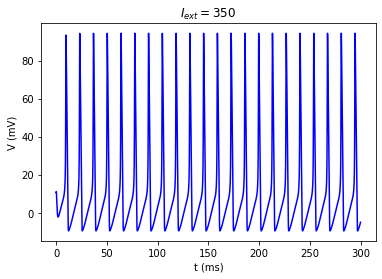

Text(0.5, 0, 't')

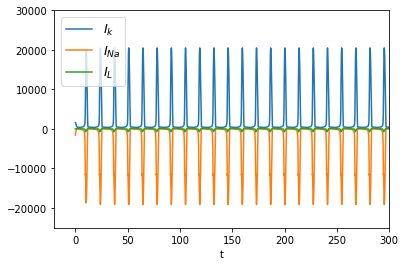

In [24]:
#CON SCIPY MEJOR
from scipy.integrate import odeint
import matplotlib.pyplot as plt

C_m = 9*pi
E_Na =115
E_K =-12
V_rest =10.6
G_Na =1080*pi
G_K =324*pi
G_m =2.7*pi
I=350

def a_m(V):
    return (25 - V)/(10*(exp((25-V)/10)-1))

def b_m(V):
    return 4 * exp(-V/18)

def a_n(V):
    return (10 - V)/(100*(exp((10-V)/10) - 1))
def b_n(V):
    return 0.125 * exp(-V/80)

def a_h(V):
    return 0.07 * exp(-V/20)
def b_h(V):
    return 1/(exp((30 - V)/10) + 1)



def neuron(y,t):
    V,m,n,h=y
    dydt=[(G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m,a_m(V)*(1-m)-b_m(V)*m,a_n(V)*(1-n)-b_n(V)*n,a_h(V)*(1-h)-b_h(V)*h]
    return dydt

y0=[V_rest, np.random.uniform(),np.random.uniform(),np.random.uniform()]
t=np.linspace(0,300,10000)

sol=odeint(neuron,y0,t)

print('feta la integració')

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.title(r'$I_{ext}=350$')
plt.show()
plt.plot(t, G_K*sol[:, 2]**4*(sol[:,0]-E_K), label=r'$I_k$')
plt.plot(t, G_Na*sol[:, 1]**3*sol[:,3]*(sol[:,0]-E_Na), label=r'$I_{Na}$')
plt.plot(t, G_m*(V_rest-sol[:,0]), label=r'$I_L$')
plt.xlim([-20,300])
plt.ylim([-25000,30000])
plt.legend(loc=2,fontsize=13)
plt.xlabel('t')


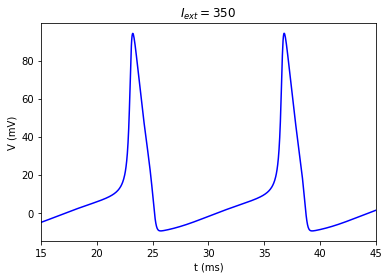

Text(0.5, 0, 't')

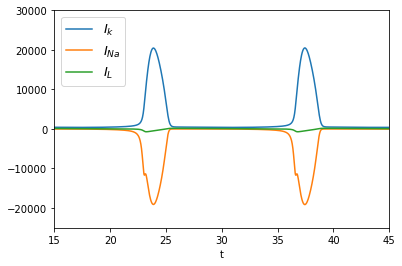

In [26]:

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.xlim([15,45])
plt.title(r'$I_{ext}=350$')
plt.show()
plt.plot(t, G_K*sol[:, 2]**4*(sol[:,0]-E_K), label=r'$I_k$')
plt.plot(t, G_Na*sol[:, 1]**3*sol[:,3]*(sol[:,0]-E_Na), label=r'$I_{Na}$')
plt.plot(t, G_m*(V_rest-sol[:,0]), label=r'$I_L$')
plt.xlim([15,45])
plt.ylim([-25000,30000])
plt.legend(loc=2,fontsize=13)
plt.xlabel('t')


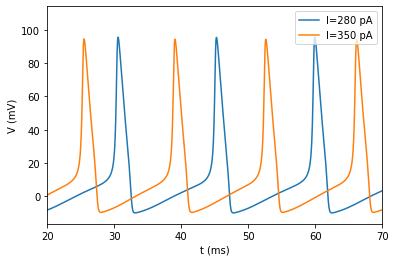

In [20]:

plt.plot(t, sol2[:, 0], label='I=280 pA')
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.xlim([20, 70])
plt.plot(t, sol[:, 0], label='I=350 pA')
plt.xlabel('t (ms)')
plt.ylabel('V (mV)')
plt.xlim([20, 70])
plt.legend()
plt.show()


feta la integració


Text(0.5, 0, 't')

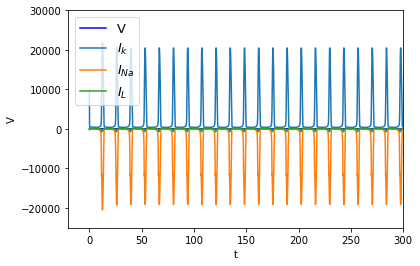

In [21]:
#CON SCIPY MEJOR
from scipy.integrate import odeint
import matplotlib.pyplot as plt

C_m = 9*pi
E_Na =115
E_K =-12
V_rest =10.6
G_Na =1080*pi
G_K =324*pi
G_m =2.7*pi
I=280

def a_m(V):
    return (25 - V)/(10*(exp((25-V)/10)-1))

def b_m(V):
    return 4 * exp(-V/18)

def a_n(V):
    return (10 - V)/(100*(exp((10-V)/10) - 1))
def b_n(V):
    return 0.125 * exp(-V/80)

def a_h(V):
    return 0.07 * exp(-V/20)
def b_h(V):
    return 1/(exp((30 - V)/10) + 1)



def neuron(y,t):
    V,m,n,h=y
    dydt=np.zeros(4)
    dydt[0]=(G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m
    dydt[1]=a_m(V)*(1-m)-b_m(V)*m
    dydt[2]=a_n(V)*(1-n)-b_n(V)*n
    dydt[3]=a_h(V)*(1-h)-b_h(V)*h
    return dydt

y0=[V_rest, np.random.uniform(),np.random.uniform(),np.random.uniform()]
t=np.linspace(0,300,10000)

sol2=odeint(neuron,y0,t)

print('feta la integració')

plt.plot(t, sol2[:, 0], 'b', label='V')
plt.xlabel('t')
plt.ylabel('V')
plt.plot(t, G_K*sol[:, 2]**4*(sol[:,0]-E_K), label=r'$I_k$')
plt.plot(t, G_Na*sol[:, 1]**3*sol[:,3]*(sol[:,0]-E_Na), label=r'$I_{Na}$')
plt.plot(t, G_m*(V_rest-sol[:,0]), label=r'$I_L$')
plt.xlim([-20,300])
plt.ylim([-25000,30000])
plt.legend(loc=2,fontsize=13)
plt.show()



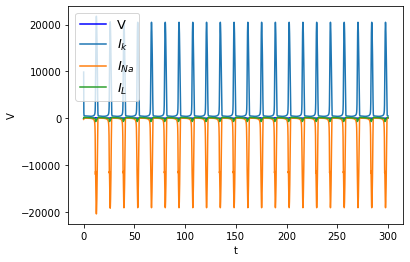

In [23]:

plt.plot(t, sol2[:, 0], 'b', label='V')
plt.xlabel('t')
plt.ylabel('V')
plt.show()
plt.plot(t, G_K*sol[:, 2]**4*(sol[:,0]-E_K), label=r'$I_k$')
plt.plot(t, G_Na*sol[:, 1]**3*sol[:,3]*(sol[:,0]-E_Na), label=r'$I_{Na}$')
plt.plot(t, G_m*(V_rest-sol[:,0]), label=r'$I_L$')
plt.legend(loc=2,fontsize=13)
plt.show()

In [178]:
hola=[]
hola.append(2)
hola.append(1)
print(hola)

[2, 1]


feta la integració


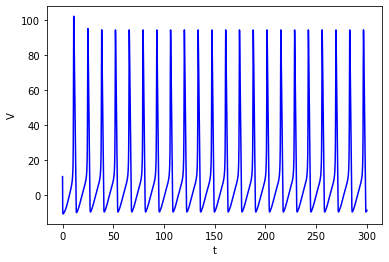

73.33333333333334


In [138]:

C_m = 9*pi
E_Na =115
E_K =-12
V_rest =10.6
G_Na =1080*pi
G_K =324*pi
G_m =2.7*pi
I=349

def a_m(V):
    return (25 - V)/(10*(exp((25-V)/10)-1))

def b_m(V):
    return 4 * exp(-V/18)

def a_n(V):
    return (10 - V)/(100*(exp((10-V)/10) - 1))
def b_n(V):
    return 0.125 * exp(-V/80)

def a_h(V):
    return 0.07 * exp(-V/20)
def b_h(V):
    return 1/(exp((30 - V)/10) + 1)



def neuron(y,t):
    V,m,n,h=y
    dydt=[(G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m,a_m(V)*(1-m)-b_m(V)*m,a_n(V)*(1-n)-b_n(V)*n,a_h(V)*(1-h)-b_h(V)*h]
    return dydt

y0=[V_rest, np.random.uniform(),np.random.uniform(),np.random.uniform()]
t=np.linspace(0,300,10000)

sol=odeint(neuron,y0,t)

print('feta la integració')

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.xlabel('t')
plt.ylabel('V')
plt.show()

peaks, _ = find_peaks(sol[:,0], height=80)
print(len(peaks)/0.3)

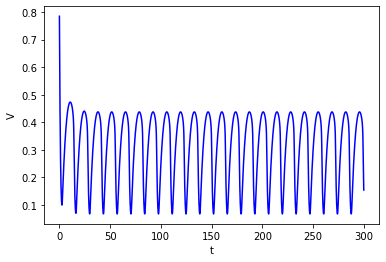

76.66666666666667


In [124]:

plt.plot(t, sol[:, 3], 'b', label='theta(t)')
plt.xlabel('t')
plt.ylabel('h')
plt.show()

peaks, _ = find_peaks(sol[:,0], height=80)
print(len(peaks)/0.3)

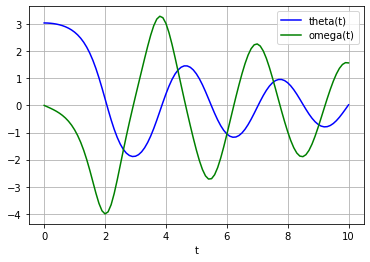

In [16]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))

import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

C:\Users\musta\AppData\Local\Temp/ipykernel_14008/641330598.py:45: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "findpeaks" failed type inference due to: Untyped global name 'odeint': Cannot determine Numba type of <class 'function'>

File "AppData\Local\Temp\ipykernel_14008\641330598.py", line 54:
<source missing, REPL/exec in use?>

  @jit
C:\Users\musta\AppData\Local\Temp/ipykernel_14008/641330598.py:45: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "findpeaks" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "AppData\Local\Temp\ipykernel_14008\641330598.py", line 52:
<source missing, REPL/exec in use?>

  @jit
C:\Users\musta\Anaconda2\envs\python3.8\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "findpeaks" was compiled in object mode without forceobj=True, but has lifted loops.



150 0 1.0 [3.4209899781385134, 0.0785512880503926, 0.37114641772366375, 0.47385862819024743]
151 1 0.0 [3.4386183286795142, 0.07870744774717695, 0.3714259774039028, 0.473228226929242]
152 2 0.0 [3.4561991930835982, 0.0788634544483055, 0.3717048108232694, 0.4725996560984721]
153 3 0.0 [3.4737328469090594, 0.07901930875827562, 0.37198292191646226, 0.47197290680397536]
154 4 0.0 [3.491219563328908, 0.0791750112776339, 0.37226031458611714, 0.4713479702137356]
155 5 0.0 [3.508659613157601, 0.07933056260300658, 0.3725369927031486, 0.4707248375571333]
156 6 0.0 [3.5260532648777203, 0.07948596332713259, 0.3728129601070875, 0.4701035001243967]
157 7 0.0 [3.5434007846661384, 0.07964121403889458, 0.37308822060641267, 0.46948394926606346]
158 8 0.0 [3.5607024364198603, 0.07979631532335069, 0.3733627779788804, 0.4688661763924446]
159 9 0.0 [3.5779584817815535, 0.07995126776176566, 0.3736366359718482, 0.4682501729730947]
160 10 0.0 [3.595169180164673, 0.08010607193164175, 0.37390979830259496, 0.4676

242 92 0.0 [4.873064957636284, 0.09234381252920398, 0.39424444920051827, 0.42255652721484355]
243 93 0.0 [4.8872390276794, 0.09248800838562667, 0.3944704132492664, 0.42206377467609735]
244 94 0.0 [4.901384203083718, 0.092632095822665, 0.39469590054155756, 0.42157225575552615]
245 95 0.0 [4.915500811918575, 0.09277609352924682, 0.3949209606259079, 0.4210818926964374]
246 96 0.0 [4.929581524784527, 0.0929199049039646, 0.39514551973386813, 0.4205927905587633]
247 97 0.0 [4.943643191382833, 0.09306371167564269, 0.39536964640337424, 0.4201048564521498]
248 98 0.0 [4.957667233896587, 0.09320731517961452, 0.39559328014507605, 0.41961816556650217]
249 99 0.0 [4.971670873054492, 0.09335090315255055, 0.3958164954515041, 0.41913261615187763]
250 100 0.0 [4.985640641234094, 0.09349433274092084, 0.39603925357261366, 0.41864825441135955]
251 101 0.0 [4.999576770867361, 0.09363760121784452, 0.3962615453918271, 0.41816509264360613]
252 102 0.0 [5.013495799192742, 0.09378087649596299, 0.396483405679951

330 180 72.0 [8.632068152334408, 0.125837738918261, 0.405124852533948, 0.42678700393789654]
331 181 73.0 [0.432625064407984, 0.37213792953588487, 0.7292747567960227, 0.07832262043457286]
332 182 72.0 [-1.883974109585957, 0.040011127574666586, 0.4396915841108563, 0.40145666873497343]
333 183 72.0 [17.71570752777899, 0.21982140369395822, 0.42889029309123666, 0.38423856329667727]
334 184 73.0 [-3.338801779225947, 0.033674842531046474, 0.4601520168496685, 0.3784137845458186]
335 185 73.0 [66.92952123351098, 0.985280857330939, 0.711101323699548, 0.12303000758745662]
336 186 72.0 [4.160963258559118, 0.0802641954509841, 0.39978830206133076, 0.4420181576096218]
337 187 73.0 [-3.4594312784230277, 0.033191423983714184, 0.4628450388108992, 0.37515197990016275]
338 188 73.0 [-8.340973671291989, 0.018509393686774595, 0.5919077660753245, 0.22908167192399168]
339 189 73.0 [-7.433468026373343, 0.14755836389618648, 0.7123748748611556, 0.09376862612227944]
340 190 73.0 [18.103064590380885, 0.69797839201

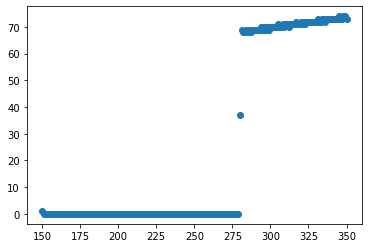

In [170]:
#Exercice 2
from numba import jit,njit

C_m = 9*pi
E_Na =115
E_K =-12
V_rest =10.6
G_Na =1080*pi
G_K =324*pi
G_m =2.7*pi

currents=np.arange(150,351,1)
t=np.linspace(0,300,10000)

@jit
def a_m(V):
    return (25 - V)/(10*(exp((25-V)/10)-1))
@jit
def b_m(V):
    return 4 * exp(-V/18)
@jit
def a_n(V):
    return (10 - V)/(100*(exp((10-V)/10) - 1))
@jit
def b_n(V):
    return 0.125 * exp(-V/80)
@jit
def a_h(V):
    return 0.07 * exp(-V/20)
@jit
def b_h(V):
    return 1/(exp((30 - V)/10) + 1)



@jit
def neuron(y,t,I):
    V,m,n,h=y
    dydt=[(G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m,a_m(V)*(1-m)-b_m(V)*m,a_n(V)*(1-n)-b_n(V)*n,a_h(V)*(1-h)-b_h(V)*h]
    return dydt




@jit
def findpeaks(a,b):
    y0=[V_rest, np.random.uniform(),np.random.uniform(),np.random.uniform()]
    currents=np.arange(a,b,1)
    n=len(currents)
    t=np.linspace(0,1000,10000)
    picos=np.zeros(n)
    for i in range(n):
        I=currents[i]
        sol=odeint(neuron,y0,t, args=(I,))
        peaks, _ = find_peaks(sol[:,0], height=80)
        picos[i]=len(peaks)
        y0=[sol[:,0][-1], sol[:,1][-1],sol[:,2][-1],sol[:,3][-1]]
        print(I,i, picos[i], y0)
    return picos
    
a=150
b=351
currents2=np.arange(a,b,1)
frequencies2=findpeaks(a,b)

plt.plot(currents2, frequencies2, 'o')
plt.show()
    
    

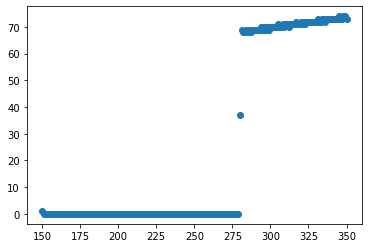

In [168]:
plt.plot(currents, frequencies2, 'o')
plt.show()
    

C:\Users\musta\AppData\Local\Temp/ipykernel_14008/1824950129.py:42: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "findpeaks" failed type inference due to: Untyped global name 'odeint': Cannot determine Numba type of <class 'function'>

File "AppData\Local\Temp\ipykernel_14008\1824950129.py", line 51:
<source missing, REPL/exec in use?>

  @jit
C:\Users\musta\AppData\Local\Temp/ipykernel_14008/1824950129.py:42: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "findpeaks" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "AppData\Local\Temp\ipykernel_14008\1824950129.py", line 49:
<source missing, REPL/exec in use?>

  @jit
C:\Users\musta\Anaconda2\envs\python3.8\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "findpeaks" was compiled in object mode without forceobj=True, but has lifted loop

351 0 74.0 [65.28771189014466, 0.9840569693277579, 0.7143992647073779, 0.11896665221256002]
350 1 73.0 [5.202547241118982, 0.08974323094013488, 0.4014443636850751, 0.4371078824687591]
349 2 74.0 [-5.8353549414571795, 0.024993929450587215, 0.5126331912728768, 0.3182319680905256]
348 3 73.0 [13.901996680367017, 0.1822426340670254, 0.4224393556882325, 0.39552522843435284]
347 4 74.0 [-4.9442277965729335, 0.027803176045670883, 0.49223732733155684, 0.34135986785284145]
346 5 73.0 [7.013552650745283, 0.10812927566458998, 0.40275387900313864, 0.43211303256504735]
345 6 74.0 [2.258011039065855, 0.4125384069311994, 0.7312146191605887, 0.0764006884695921]
344 7 73.0 [-5.008332640936171, 0.027593881515844722, 0.49271885406361404, 0.3410304761923683]
343 8 73.0 [0.624220720871903, 0.05365030089692073, 0.4178049493700823, 0.4243311703591448]
342 9 73.0 [3.772789345175457, 0.07684383680364366, 0.40174511840769805, 0.43978890969831713]
341 10 73.0 [4.767344988315433, 0.08571801013967383, 0.4000238855

263 88 66.0 [7.37333096469271, 0.11307353648720339, 0.3921720295616968, 0.45031394976085143]
262 89 67.0 [-9.61391642099609, 0.016197655159969345, 0.6388117708057989, 0.17905802398941395]
261 90 66.0 [-2.646469809759224, 0.03670463373615022, 0.429353090883689, 0.41942763313334747]
260 91 66.0 [2.4099394780939374, 0.06644757063540127, 0.38774310466274187, 0.4655042038897773]
259 92 66.0 [4.2769157652850724, 0.08201179173639837, 0.38434931137089284, 0.46709269578691454]
258 93 66.0 [3.5592279437484216, 0.07572340597212988, 0.3845699067916411, 0.4680592660110453]
257 94 66.0 [0.03366372986498084, 0.0504273204102755, 0.40034048830385194, 0.4526867451480726]
256 95 66.0 [-6.809969648237767, 0.02228476388863138, 0.5094848324276655, 0.3277466165186947]
255 96 66.0 [94.88857419731535, 0.9407722806344894, 0.5862078024294667, 0.22216376995744513]
254 97 65.0 [0.38130647343019713, 0.05254209098955581, 0.39692081633547155, 0.45680372849954265]
253 98 66.0 [70.35438251878851, 0.987515617623093, 0.7

175 176 0.0 [3.848057877783562, 0.08241072379121635, 0.3779261930740306, 0.45862802491287424]
174 177 0.0 [3.8314976972170527, 0.0822580768164726, 0.3776630391231726, 0.4592168308307112]
173 178 0.0 [3.814895809466086, 0.0821052898043672, 0.37739924186547014, 0.45980727736143473]
172 179 0.0 [3.7982519857579793, 0.08195236223031602, 0.37713479799905897, 0.4603993721552926]
171 180 0.0 [3.7815659954298066, 0.0817992935664031, 0.37686970419633886, 0.4609931229140109]
170 181 0.0 [3.764837605908089, 0.08164608328135525, 0.37660395710370875, 0.46158853739124495]
169 182 0.0 [3.748066582687681, 0.08149273084051241, 0.3763375533412982, 0.46218562339303154]
168 183 0.0 [3.7312526893108924, 0.08133923570580222, 0.37607048950269684, 0.4627843887782458]
167 184 0.0 [3.714395687345932, 0.08118559733571067, 0.375802762154679, 0.46338484145906567]
166 185 0.0 [3.6974953363653746, 0.08103181518525547, 0.37553436783692573, 0.46398698940143784]
165 186 0.0 [3.680551393924144, 0.08087788870595719, 0.37

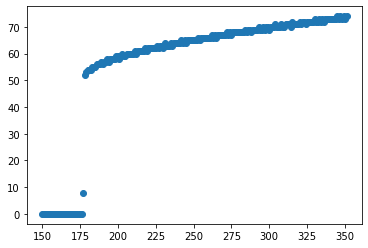

In [172]:

C_m = 9*pi
E_Na =115
E_K =-12
V_rest =10.6
G_Na =1080*pi
G_K =324*pi
G_m =2.7*pi

currents=np.arange(150,351,1)
t=np.linspace(0,300,10000)

@jit
def a_m(V):
    return (25 - V)/(10*(exp((25-V)/10)-1))
@jit
def b_m(V):
    return 4 * exp(-V/18)
@jit
def a_n(V):
    return (10 - V)/(100*(exp((10-V)/10) - 1))
@jit
def b_n(V):
    return 0.125 * exp(-V/80)
@jit
def a_h(V):
    return 0.07 * exp(-V/20)
@jit
def b_h(V):
    return 1/(exp((30 - V)/10) + 1)



@jit
def neuron(y,t,I):
    V,m,n,h=y
    dydt=[(G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m,a_m(V)*(1-m)-b_m(V)*m,a_n(V)*(1-n)-b_n(V)*n,a_h(V)*(1-h)-b_h(V)*h]
    return dydt




@jit
def findpeaks(a,b):
    y0=[V_rest, np.random.uniform(),np.random.uniform(),np.random.uniform()]
    currents=np.arange(a,b,-1)
    n=len(currents)
    t=np.linspace(0,1000,10000)
    picos=np.zeros(n)
    for i in range(n):
        I=currents[i]
        sol=odeint(neuron,y0,t, args=(I,))
        peaks, _ = find_peaks(sol[:,0], height=80)
        picos[i]=len(peaks)
        y0=[sol[:,0][-1], sol[:,1][-1],sol[:,2][-1],sol[:,3][-1]]
        print(I,i, picos[i], y0)
    return picos
    
b=149
a=351
currents=np.arange(a,b,-1)
frequencies=findpeaks(a,b)

plt.plot(currents, frequencies, 'o')
plt.show()
    
    

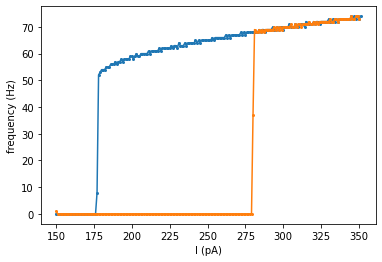

In [175]:
plt.plot(currents, frequencies, '-o', markersize=2)
plt.plot(currents2, frequencies2, '-o', markersize=2)
plt.xlabel('I (pA)')
plt.ylabel('frequency (Hz)')
plt.show()

In [142]:
currents, frequencies

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]),
 array([76.66666667, 73.33333333, 73.33333333, 73.33333333, 73.33333333,
        73.33333333, 73.33333333, 73.33333333, 73.33333333, 73.33333333,
        73.33333333, 73.33333333, 76.66666667, 73.33333333, 73.33333333,
        73.33333333, 73.33333333, 73.33333333, 73.33333333, 73.33333333,
        73.33333333, 73.33333333, 73.33333333, 76.66666667, 73.33333333,
        73.33333333, 73.33333333, 73.33333333, 73.33333333, 73.33333333,
        73.33333333, 73.33333333, 73.33333333, 73.33333333, 76.66666667,
        73.33333333, 73.33333333, 73.33333333, 73.33333333, 73.33333333,
        73.33333333, 73.33333333, 73.33333333, 73.33333333, 73.33333333,
        73.33333333, 76.66666667, 73.33333333, 73.33333333,

C:\Users\musta\AppData\Local\Temp/ipykernel_14008/2167982403.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "neuron" failed type inference due to: Untyped global name 'a_m': Cannot determine Numba type of <class 'function'>

File "AppData\Local\Temp\ipykernel_14008\2167982403.py", line 4:
<source missing, REPL/exec in use?>

  @jit
C:\Users\musta\Anaconda2\envs\python3.8\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "neuron" was compiled in object mode without forceobj=True.

File "AppData\Local\Temp\ipykernel_14008\2167982403.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\musta\Anaconda2\envs\python3.8\lib\site-packages\numba\core\object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit

feta la integració


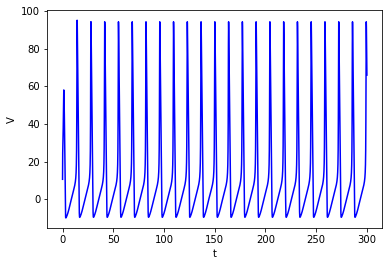

Text(0.5, 0, 't')

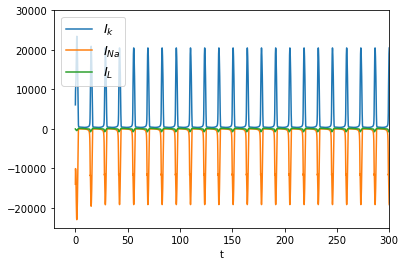

In [87]:
@jit
def neuron(y,t):
    V,m,n,h=y
    dydt=[(G_Na *m**3 * h* (E_Na - V) + G_K * n**4 * (E_K - V) + G_m * (V_rest - V) + I)/C_m,a_m(V)*(1-m)-b_m(V)*m,a_n(V)*(1-n)-b_n(V)*n,a_h(V)*(1-h)-b_h(V)*h]
    return dydt

@jit
def solution(neuron, y0,t):
    return odeint(neuron,y0,t)

sol=odeint(neuron,y0,t)

print('feta la integració')

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.xlabel('t')
plt.ylabel('V')
plt.show()
plt.plot(t, G_K*sol[:, 2]**4*(sol[:,0]-E_K), label=r'$I_k$')
plt.plot(t, G_Na*sol[:, 1]**3*sol[:,3]*(sol[:,0]-E_Na), label=r'$I_{Na}$')
plt.plot(t, G_m*(V_rest-sol[:,0]), label=r'$I_L$')
plt.xlim([-20,300])
plt.ylim([-25000,30000])
plt.legend(loc=2,fontsize=13)
plt.xlabel('t')
